In [1]:
import requests

url = "https://eonet.gsfc.nasa.gov/api/v3/events"
response = requests.get(url)
events = response.json()

In [2]:
events

{'title': 'EONET Events',
 'description': 'Natural events from EONET.',
 'link': 'https://eonet.gsfc.nasa.gov/api/v3/events',
 'events': [{'id': 'EONET_6455',
   'title': 'Etna Volcano, Italy',
   'description': None,
   'link': 'https://eonet.gsfc.nasa.gov/api/v3/events/EONET_6455',
   'closed': None,
   'categories': [{'id': 'volcanoes', 'title': 'Volcanoes'}],
   'sources': [{'id': 'SIVolcano',
     'url': 'https://volcano.si.edu/volcano.cfm?vn=211060'}],
   'geometry': [{'magnitudeValue': None,
     'magnitudeUnit': None,
     'date': '2023-11-12T00:00:00Z',
     'type': 'Point',
     'coordinates': [14.999, 37.748]}]},
  {'id': 'EONET_6452',
   'title': 'Dukono Volcano, Indonesia',
   'description': None,
   'link': 'https://eonet.gsfc.nasa.gov/api/v3/events/EONET_6452',
   'closed': None,
   'categories': [{'id': 'volcanoes', 'title': 'Volcanoes'}],
   'sources': [{'id': 'SIVolcano',
     'url': 'https://volcano.si.edu/volcano.cfm?vn=268010'}],
   'geometry': [{'magnitudeValue': 

In [11]:
import requests

def get_latest_events():
    try:
        response = requests.get("https://eonet.gsfc.nasa.gov/api/v3/events")
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

events = get_latest_events()
if events:
    for event in events['events']:
        print(f"Event: {event['title']}, Categories: {event['categories']}, Date: {event['geometry'][0]['date']}")


Event: Etna Volcano, Italy, Categories: [{'id': 'volcanoes', 'title': 'Volcanoes'}], Date: 2023-11-12T00:00:00Z
Event: Dukono Volcano, Indonesia, Categories: [{'id': 'volcanoes', 'title': 'Volcanoes'}], Date: 2023-11-07T00:00:00Z
Event: Wvnrp Steep Valley Fire Information, Categories: [{'id': 'wildfires', 'title': 'Wildfires'}], Date: 2023-11-06T19:00:00Z
Event: Ulawun Volcano, Papua New Guinea, Categories: [{'id': 'volcanoes', 'title': 'Volcanoes'}], Date: 2023-11-02T00:00:00Z
Event: Ioto Volcano, Japan, Categories: [{'id': 'volcanoes', 'title': 'Volcanoes'}], Date: 2023-10-30T00:00:00Z
Event: Iceberg D34, Categories: [{'id': 'seaLakeIce', 'title': 'Sea and Lake Ice'}], Date: 2023-10-20T00:00:00Z
Event: Bezymianny Volcano, Russia, Categories: [{'id': 'volcanoes', 'title': 'Volcanoes'}], Date: 2023-10-17T00:00:00Z
Event: Home Reef Volcano, Tonga, Categories: [{'id': 'volcanoes', 'title': 'Volcanoes'}], Date: 2023-10-17T00:00:00Z
Event: Iceberg D33A, Categories: [{'id': 'seaLakeIce', 't

In [4]:
import requests
import matplotlib.pyplot as plt

# Fetching data from EONET API
def fetch_eonet_events():
    try:
        response = requests.get("https://eonet.gsfc.nasa.gov/api/v3/events")
        if response.status_code == 200:
            return response.json()['events']
        else:
            print(f"Error: {response.status_code}")
            return []
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

# Process data to count events per category
def count_events_by_category(events):
    category_counts = {}
    for event in events:
        for category in event['categories']:
            category_name = category['title']
            category_counts[category_name] = category_counts.get(category_name, 0) + 1
    return category_counts

# Fetch and process data
events = fetch_eonet_events()
category_counts = count_events_by_category(events)

# Check the processed data
category_counts

{'Volcanoes': 28, 'Wildfires': 319, 'Sea and Lake Ice': 49}

In [15]:
import requests
import matplotlib.pyplot as plt

def fetch_eonet_events_for_year(year):
    url = f"https://eonet.gsfc.nasa.gov/api/v3/events?start={year}-01-01&end={year}-12-31"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()['events']
    else:
        return []

def count_events_by_category(events):
    category_counts = {}
    for event in events:
        for category in event['categories']:
            category_name = category['title']
            category_counts[category_name] = category_counts.get(category_name, 0) + 1
    return category_counts

# Assuming the current year is 2023
years = [2018, 2019, 2020, 2021, 2022, 2023]
all_data = {}

for year in years:
    events = fetch_eonet_events_for_year(year)
    all_data[year] = count_events_by_category(events)

# all_data now contains the counts per category for each year

# Plotting the data (you will need to structure it appropriately for the plot)
all_data

{2018: {'Sea and Lake Ice': 2},
 2019: {'Sea and Lake Ice': 19, 'Volcanoes': 2},
 2020: {'Sea and Lake Ice': 7, 'Volcanoes': 3},
 2021: {'Wildfires': 235, 'Volcanoes': 2, 'Sea and Lake Ice': 18},
 2022: {'Sea and Lake Ice': 26, 'Volcanoes': 5, 'Wildfires': 77},
 2023: {'Volcanoes': 14, 'Wildfires': 7, 'Sea and Lake Ice': 36}}

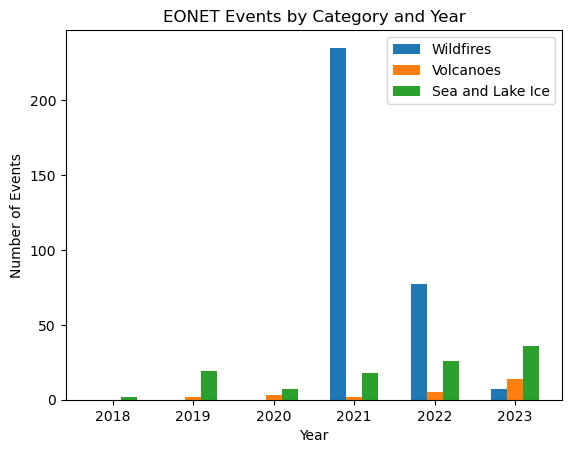

In [16]:
# Preparing data for plotting
categories = set()
for year in all_data:
    categories.update(all_data[year].keys())

# Initialize counts for each category for each year
plot_data = {category: {year: 0 for year in all_data.keys()} for category in categories}
for year, events in all_data.items():
    for category, count in events.items():
        plot_data[category][year] = count

# Data for plotting
years = list(all_data.keys())
categories = list(plot_data.keys())
category_data = [[plot_data[category][year] for year in years] for category in categories]

# Plotting
fig, ax = plt.subplots()
for i, category in enumerate(categories):
    ax.bar([x + i*0.2 for x in range(len(years))], category_data[i], width=0.2, label=category)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Year')
ax.set_ylabel('Number of Events')
ax.set_title('EONET Events by Category and Year')
ax.set_xticks([x + 0.2 for x in range(len(years))])
ax.set_xticklabels(years)
ax.legend()

plt.show()
